# Preamble

In [25]:
import main
import math
import networkx as nx
import matplotlib as mpl
import matplotlib.animation as m_anim
import matplotlib.pyplot as plt
import sklearn
from IPython.display import clear_output, HTML
import numpy as np
from tqdm.auto import tqdm
from dataclasses import replace

In [2]:
%load_ext autoreload
%load_ext pyinstrument
%autoreload 1
%aimport main
# %matplotlib widget

In [3]:
IMG_PREFIX = "~/blog/_img/2025_embeddings_"
VID_PREFIX = "~/blog/resources/2025_embeddings_"

In [4]:
def rot(r: float):
    return np.array([
        [math.cos(r), -math.sin(r)],
        [math.sin(r), math.cos(r)],
    ])

# Embedding Grids

  0%|          | 0/500 [00:00<?, ?it/s]

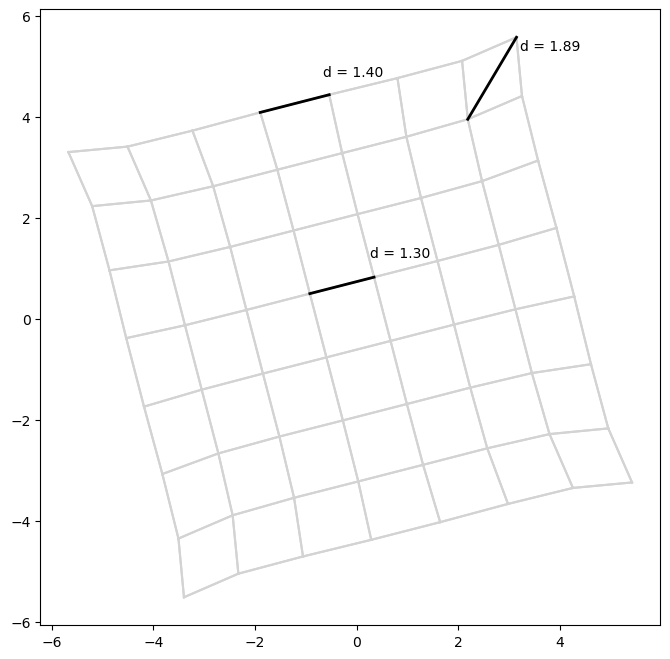

In [11]:
graph_8 = main.chessboard(8)
embedding = main.Planariser(graph_8, 2, seed=7).fit_embeddding(num_iterations=500)

def plot_distance(
    n,
    embedding,
    xy1,
    xy2,
    ax,
    line_props,
    annotate_props,
):
    artists = []
    idx1 = xy1[0] + xy1[1] * n
    idx2 = xy2[0] + xy2[1] * n

    x1, y1 = embedding[:, idx1]
    x2, y2 = embedding[:, idx2]

    distance = ((embedding[:, idx1] - embedding[:, idx2])**2).sum() ** 0.5
    artists += ax.plot([x1, x2], [y1, y2], **line_props)
    artists.append(ax.annotate(
        f"d = {distance:.2f}",
        ((x1 + x2) / 2, (y1 + y2) / 2),
        **annotate_props,
    ))
    return artists

fig, ax = plt.subplots(figsize=(8,8))
graph_8.plot_2d(
    ax,
    embedding,
    edge_kwargs={"color": "lightgrey"},
)

for pos1, pos2 in [
    ((7, 7), (6, 6)),
    ((3, 7), (4, 7)),
    ((3, 4), (4, 4)),
]:
    plot_distance(
        8,
        embedding,
        pos1,
        pos2,
        ax,
        line_props={
            "color": "black",
            "linewidth": 2,
        },
        annotate_props={
            "color": "black",
            "textcoords": "offset fontsize",
            "xytext": (2, 2),
        },
    )
fig.savefig(IMG_PREFIX + "grid8x8.png", transparent=True)

In [12]:
graph_16 = main.chessboard(16)

In [13]:
# %%pyinstrument
embedding = main.Planariser(graph_16, 2, seed=7, loss_order=2).fit_embeddding(num_iterations=500)

fig, ax = plt.subplots(figsize=(8,8))
graph_16.plot_2d(
    ax,
    embedding,
    edge_kwargs={"color": "lightgrey"},
)

for pos1, pos2 in [
    ((15, 15), (14, 14)),
    ((3, 15), (4, 15)),
    ((3, 4), (4, 4)),
]:
    plot_distance(
        16,
        embedding,
        pos1,
        pos2,
        ax=ax,
        line_props={
            "color": "black",
            "linewidth": 2,
        },
        annotate_props={
            "color": "black",
            "textcoords": "offset fontsize",
            "xytext": (2, 2),
            "fontweight": "bold",
        },
    )
fig.savefig(IMG_PREFIX + "grid16x16.png", transparent=True)

KeyboardInterrupt: 

In [ ]:
# %%pyinstrument
fig, axs = plt.subplots(2, 2, figsize=(8,8))
for idx, ax in enumerate([
    ax
    for row in axs
    for ax in row
]):
    order = idx + 1
    embedding = main.Planariser(
        graph_16, 2, seed=7, loss_order=order
    ).fit_embeddding(num_iterations=500)
    
    graph_16.plot_2d(
        ax,
        embedding,
        edge_kwargs={"color": "lightgrey"},
    )
    
    for pos1, pos2 in [
        ((15, 15), (14, 14)),
        ((3, 15), (4, 15)),
        ((3, 4), (4, 4)),
    ]:
        plot_distance(
            16,
            embedding,
            pos1,
            pos2,
            ax=ax,
            line_props={
                "color": "black",
                "linewidth": 2,
            },
            annotate_props={
                "color": "black",
                "textcoords": "offset fontsize",
                "xytext": (-1.5, 1),
                "fontweight": "bold",
            },
        )
    ax.set_title(
        rf"$$ \mathcal L_{order}$$",
        usetex=True,
    )
fig.savefig(IMG_PREFIX + "different_orders.png", transparent=True)

## Animations

In [ ]:
artists = []
# fig = plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(figsize=(8, 8))
for embedding in main.Planariser(graph_8, 2, seed=8).iter_embedddings(
    num_iterations=250,
    iterations_per_yield=1
):
    artists.append(
        graph_8.plot_2d(
            ax,
            embedding,
            edge_kwargs={
                "color": "lightgrey",
            }
        )
    )

anim = m_anim.ArtistAnimation(
    fig,
    artists,
    interval=33,
    repeat=True,
    blit=True,
)
print("Saving animation...")
anim.save(
    VID_PREFIX + "misfit_grid_anim.mp4",
    # blit=True,
)

In [ ]:
artists = []
# fig = plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(figsize=(8, 8))
for embedding in main.Planariser(graph_8, 2, seed=9).iter_embedddings(
    num_iterations=150,
    iterations_per_yield=1,
):
    artists.append(
        graph_8.plot_2d(
            ax,
            embedding,
            edge_kwargs={
                "color": "lightgrey",
            }
        )
    )

anim = m_anim.ArtistAnimation(
    fig,
    artists,
    interval=33,
    repeat=True,
    blit=True,
)
print("Saving animation...")
anim.save(
    VID_PREFIX + "fit_grid_anim.mp4",
    # blit=True,
)

In [ ]:
artists = []
# fig = plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(figsize=(8, 8))
for iteration_idx, embedding in enumerate(
    main.Planariser(graph_8, 2, seed=8).iter_embedddings(
        num_iterations=300,
        iterations_per_yield=1
    )
):
    artists.append(
        graph_8.plot_2d(
            ax,
            embedding,
            edge_kwargs={
                "color": "lightgrey",
            }
        )
    )
    title = ax.text(
        0.05,0.95,
        f"Iteration {iteration_idx + 1}",
        bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
        transform=ax.transAxes,
        ha="left"
    )
    artists[-1].append(
        title
    )

anim = m_anim.ArtistAnimation(
    fig,
    artists,
    interval=33,
    repeat=True,
    blit=True,
)
print("Saving animation...")
# anim.save(
#     VID_PREFIX + "fit_grid_anim.mp4",
#     # blit=True,
# )

In [ ]:
HTML(anim.to_html5_video())

# Define all the boards

In [5]:
simple_board = main.ti_board(
    7,
    [
        [20],
        [32, 23],
        [0, 42, 0],
        [50, 28, 25, 45],
        [37, 48, 34],
        [49, 40, 39, 29],
        [46, 18, 21,],
        [43, 36, 26, 22],
        [27, 38, 31],
        [0, 47, 44, 0,],
        [24, 46, 33,],
        [30, 19,],
        [0],
    ],
    extra_connections=[
        (25, 40),
    ],
    wormholes={
        "α": [39, 26],
        "β": [25, 40],
    },
)

actual_wormholes = {
    "α": [79, 39, 26],
    "β": [64, 40, 25],
}
board_flat = main.ti_board(
    7,
    [
        [0],
        [41, 31],
        [25, 77, 79],
        [0, 66, 65, 0],
        [78, 35, 38],
        [61, 28, 40, 76],
        [39, 18, 44],
        [32, 62, 74, 26],
        [46, main.TileSpec(85, "A"), 47],
        [0, main.TileSpec(87, "A"), main.TileSpec(88, "A"), 0],
        [64, 75, 36],
        [main.TileSpec(84, "A"), main.TileSpec(83, "A")],
        [main.TileSpec(86, "A")],
    ],
    extra_connections=[],
    wormholes=actual_wormholes,
)

board_penta = main.ti_board(
    7,
    [
        [0],
        [41, 31],
        [25, 77, 79],
        [0, 66, 65, 0],
        [78, 35, 38],
        [61, 28, 40, 76],
        [39, 18, 44],
        [32, 62, 74, 26],
        [46, None, 47],
        [0, None, None, 0],
        [64, 75, 36],
        [None, None],
        [None],
    ],
    extra_connections=[
        # (25, 64),
        # (25, 40),
        # (64, 40),
        # (79, 39),
        # (79, 26),
        # (39, 26),
        (62, 74),
        (62, 75),
        (46, 75),
        (64, 75),
        (75, 36),
        (75, 47),
        (75, 74),
        (64, 36),        
        # (main.TileSpec(25), main.TileSpec(40))
    ],
    wormholes=actual_wormholes,
)

board_full = main.ti_board(
    7,
    [
        [0],
        [41, 31],
        [25, 77, 79],
        [0, 66, 65, 0],
        [78, 35, 38],
        [61, 28, 40, 76],
        [39, 18, 44],
        [32, 62, 74, 26],
        [46, None, 47],
        [0, None, None, 0],
        [64, 75, 36],
        [None, None],
        [None],
    ],
    extra_connections=[
        (25, 64),
        (25, 40),
        (64, 40),
        (79, 39),
        (79, 26),
        (39, 26),
        (62, 74),
        (62, 75),
        (46, 75),
        (64, 75),
        (75, 36),
        (75, 47),
        (75, 74),
        (64, 36),
    ],
    wormholes=actual_wormholes,
)

# Embedding TI Boards 2D

In [6]:
WORMHOLE_COLORS = {
    "α": "#F8A000",
    "β": "#B4CB00",
    "γ": "#BADCF2",
    "μ": "red",
}

In [7]:
def draw_nodes(board, positions):
    for idx, node in enumerate(board.node_meta):
        pos = positions[:, idx]
        main.plot_tile(ax, 0.5, pos, node.tile_spec)
        for wormhole_label in node.wormhole_labels:
            circle = plt.Circle(pos, 0.2, color="grey", alpha=0.6, linewidth=0)
            ax.add_patch(circle)
            ax.text(
                *pos,
                wormhole_label,
                horizontalalignment="center",
                verticalalignment="center",
                fontweight="bold",
                fontsize="xx-large",
                color=WORMHOLE_COLORS[wormhole_label],
            )

In [8]:
positions = main.Planariser(simple_board, 2, seed=8).fit_embeddding(
    num_iterations=1000,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

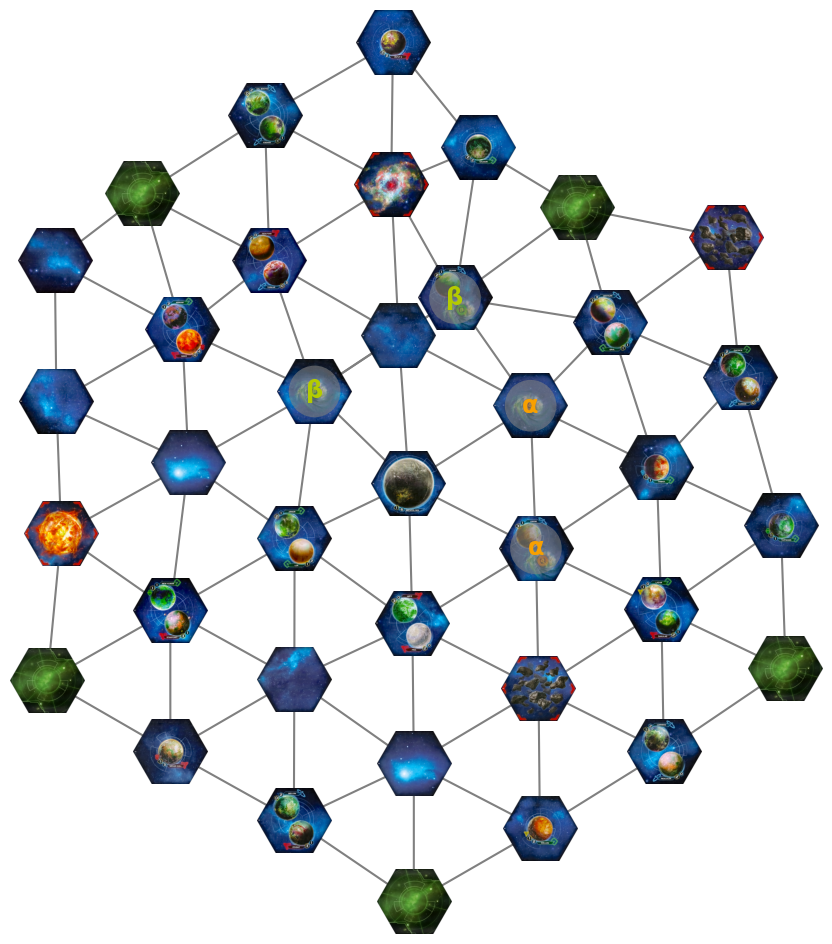

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

positions_rot = rot(50 / 360 * 2 * math.pi) @ positions.detach().numpy()

draw_nodes(simple_board, positions_rot)

simple_board.plot_2d(
    ax=ax,
    positions=positions_rot,
    edge_kwargs={
        "zorder": -1,
        "color": "grey",
    }
)
ax.axis(False)
plt.savefig(IMG_PREFIX + "simple_board.png", transparent=True)
None

  0%|          | 0/1000 [00:00<?, ?it/s]

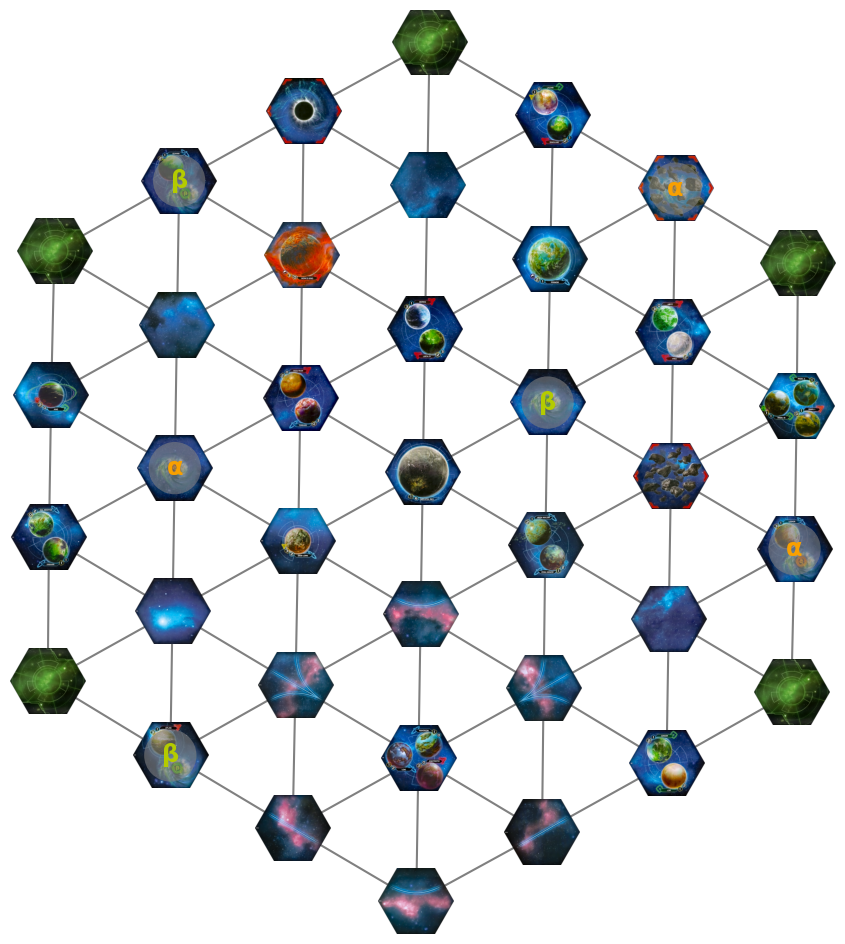

In [10]:
positions = main.Planariser(board_flat, 2, seed=8).fit_embeddding(
    num_iterations=1000,
)

fig, ax = plt.subplots(figsize=(12, 12))

positions_rot = rot(41 / 360 * 2 * math.pi) @ positions.detach().numpy()

draw_nodes(board_flat, positions_rot)

board_flat.plot_2d(
    ax=ax,
    positions=positions_rot,
    edge_kwargs={
        "zorder": -1,
        "color": "grey",
    }
)
ax.axis(False)
plt.savefig(IMG_PREFIX + "actual_board_flat.png", transparent=True)
None

  0%|          | 0/1000 [00:00<?, ?it/s]

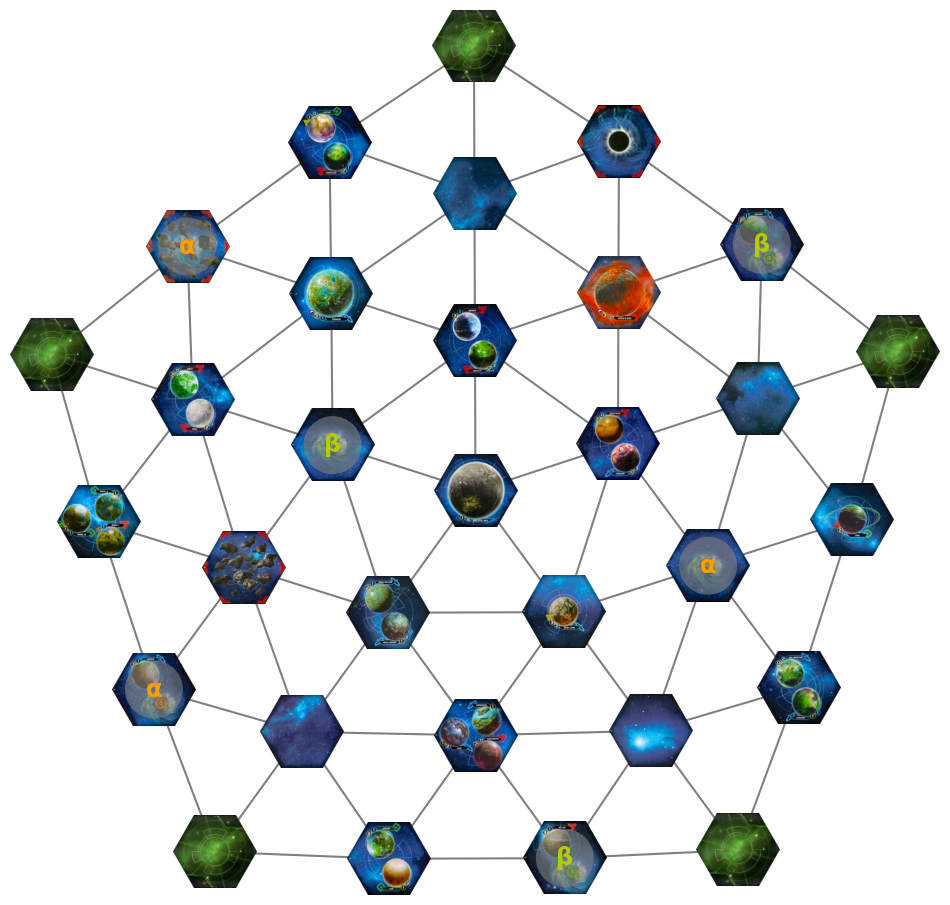

In [11]:
positions = main.Planariser(board_penta, 2, seed=8).fit_embeddding(
    num_iterations=1000,
)

fig, ax = plt.subplots(figsize=(12, 12))

positions_rot = rot(143 / 360 * 2 * math.pi) @ positions.detach().numpy()

draw_nodes(board_penta, positions_rot)

board_penta.plot_2d(
    ax=ax,
    positions=positions_rot,
    edge_kwargs={
        "zorder": -1,
        "color": "grey",
    }
)
ax.axis(False)
plt.savefig(IMG_PREFIX + "actual_board_pentagonal.png", transparent=True)
None

  0%|          | 0/5000 [00:00<?, ?it/s]

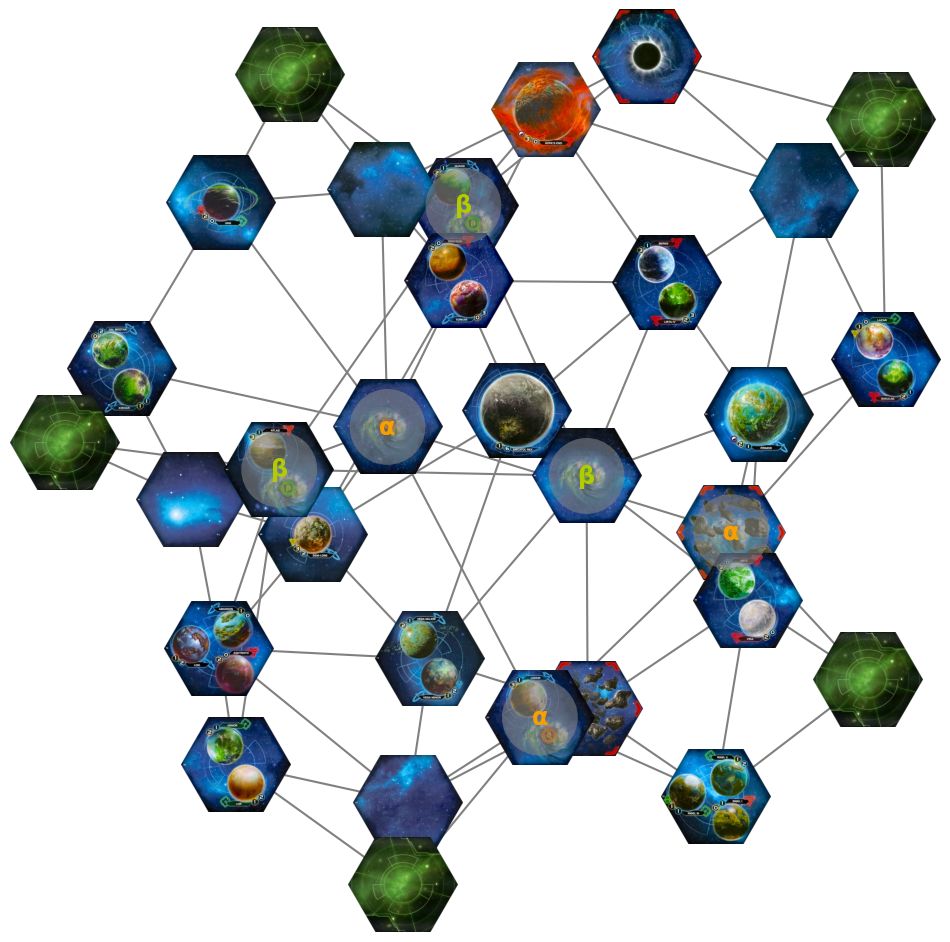

In [12]:
positions = main.Planariser(board_full, 2, seed=8).fit_embeddding(
    num_iterations=5000,
)

fig, ax = plt.subplots(figsize=(12, 12))

positions_rot = rot(0 / 360 * 2 * math.pi) @ positions.detach().numpy()

draw_nodes(board_full, positions_rot)

board_full.plot_2d(
    ax=ax,
    positions=positions_rot,
    edge_kwargs={
        "zorder": -1,
        "color": "grey",
    }
)
ax.axis(False)
plt.savefig(IMG_PREFIX + "actual_board_with_wormholes.png", transparent=True)
None

# Embedding TI Boards 3D

In [13]:
positions = main.Planariser(board_full, num_dims=3, seed=0).fit_embeddding(
    num_iterations=5000,
)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [14]:
pca = sklearn.decomposition.PCA(2, whiten=True)
res = pca.fit(positions)

/tmp/ipykernel_3049/284302787.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


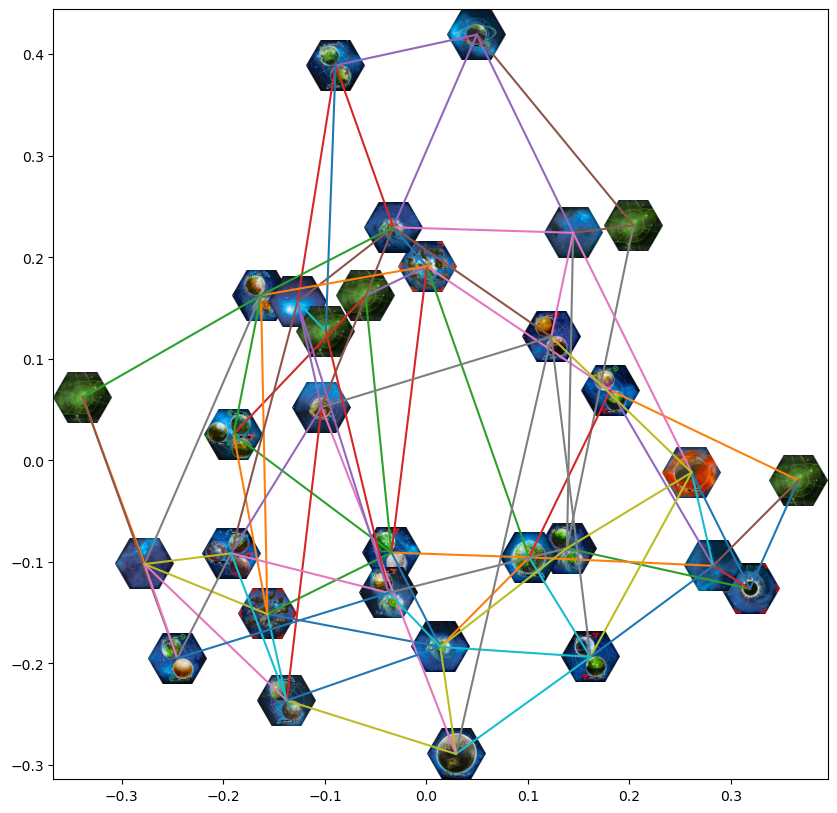

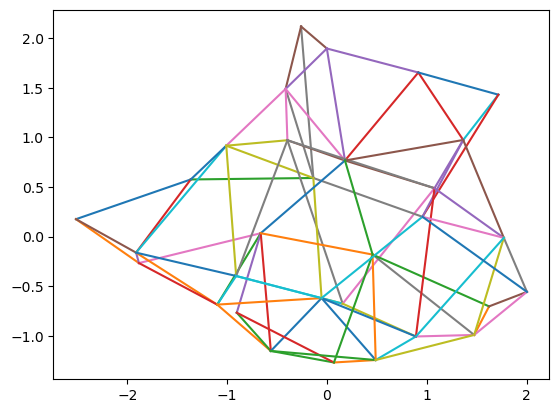

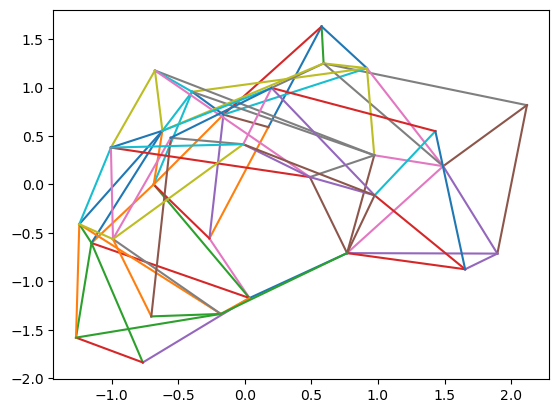

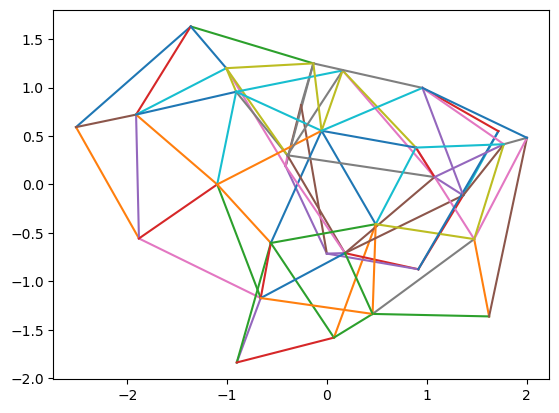

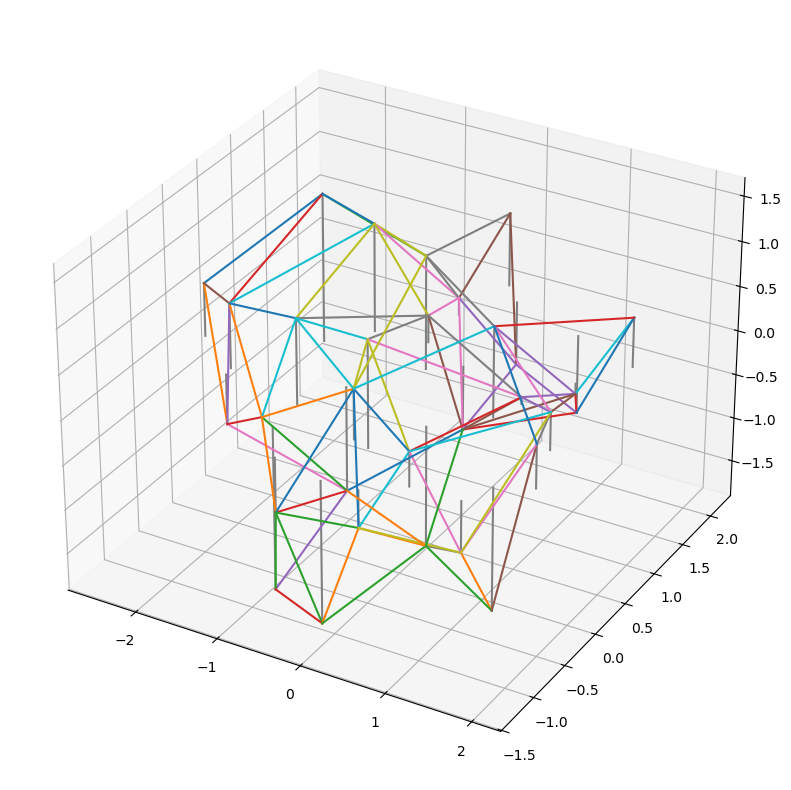

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(res.components_[0, :], res.components_[1, :])
for idx, node in enumerate(board_full.node_meta):
    pos = res.components_[:, idx]
    main.plot_tile(ax, 0.05, pos, node.tile_spec)
board_full.plot_2d(ax, res.components_)
None

fig, ax = plt.subplots()
board_full.plot_2d(ax, positions[:2, :])
None

fig, ax = plt.subplots()
board_full.plot_2d(ax, positions[1:, :])
None

fig, ax = plt.subplots()
board_full.plot_2d(ax, np.concat([positions[0:1, :], positions[2:3, :]]))
None

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
board_full.plot_3d(ax, positions)
fig.show()
None

In [16]:
pos_full = main.Planariser(board_full, num_dims=3, seed=0).fit_embeddding(
    num_iterations=5000,
)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [17]:
player_textops = {
    "fontweight": "bold",
    "color": "white",
    "horizontalalignment": "center",
    "verticalalignment": "center",
}

In [18]:
def draw_wormholes_3d(ax, board, pos):
    artists = []
    for idx, node in enumerate(board.node_meta):
        for label in node.wormhole_labels:
            artists.append(
                ax.text(*pos[:, idx], label, fontweight="bold", color=WORMHOLE_COLORS[label], horizontalalignment="center", verticalalignment="center", size="xx-large")
            )
    return artists

def draw_players_3d(ax, pos):
    artists = []
    artists.append(ax.text(*pos[:, 0], "Player Y", **player_textops))
    artists.append(ax.text(*pos[:, 6], "Randomator", **player_textops))
    artists.append(ax.text(*pos[:, 9], "Player X", **player_textops))
    artists.append(ax.text(*pos[:, 26], "Me", **player_textops))
    artists.append(ax.text(*pos[:, 27], "ErrorMargin", **player_textops))
    artists.append(ax.text(*pos[:, 18], "Mecatol Rex", **player_textops))
    return artists

/tmp/ipykernel_3049/3782443494.py:31: UserWarning: frames=<function gen at 0x7f3886214b80> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)


  0%|          | 0/361 [00:00<?, ?it/s]

  0%|          | 0/361 [00:00<?, ?it/s]

  0%|          | 0/361 [00:00<?, ?it/s]

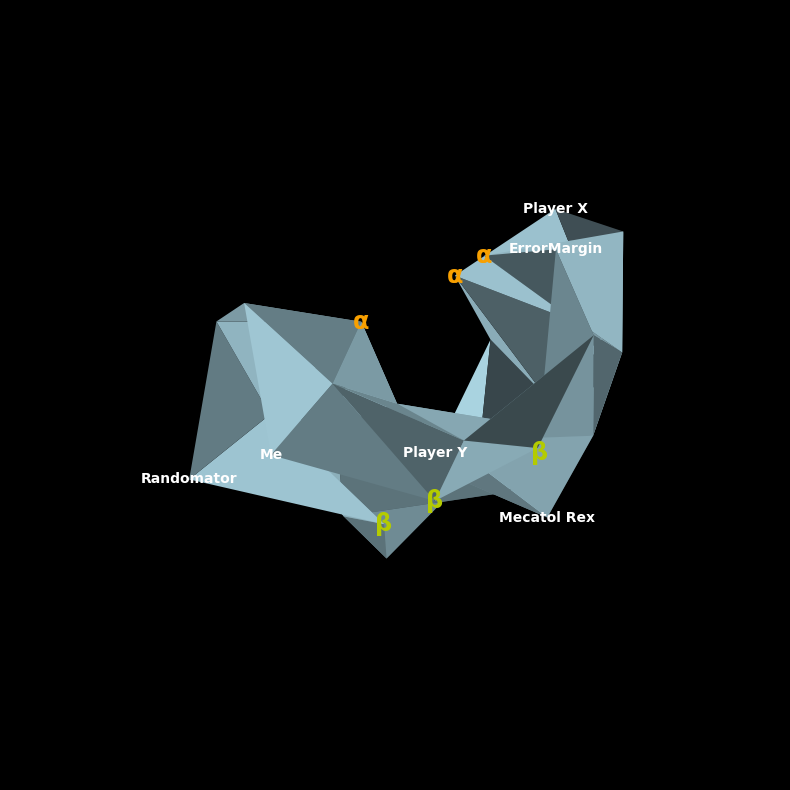

In [78]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
# main.plot_tile(ax, 0.5, pos_full[0:2, 18], main.TileSpec(18))
ax.plot_trisurf(
    pos_full[0],
    pos_full[1],
    pos_full[2],
    triangles=board_penta.get_triangle_indices(),
    color="lightblue",
)
ax.axis(False)
ax.set_facecolor("black")
fig.set_facecolor("black")

draw_wormholes_3d(ax, board_full, pos_full)
draw_players_3d(ax, pos_full)
        
def update(data):
    angle = data
    ax.view_init(elev=0., azim=angle, roll=180)
    # clear_output(wait=True)
    # fig.show()
    # time.sleep(0.02)
    # plt.draw()
    # plt.pause(0.25)

def gen():
    for angle in tqdm(list(range(0, 360 + 1, 1))):
        yield angle

update(0)
anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)
# plt.show()
# ax.imshow(tile)

anim.save(VID_PREFIX + "anonymous_board.mp4")

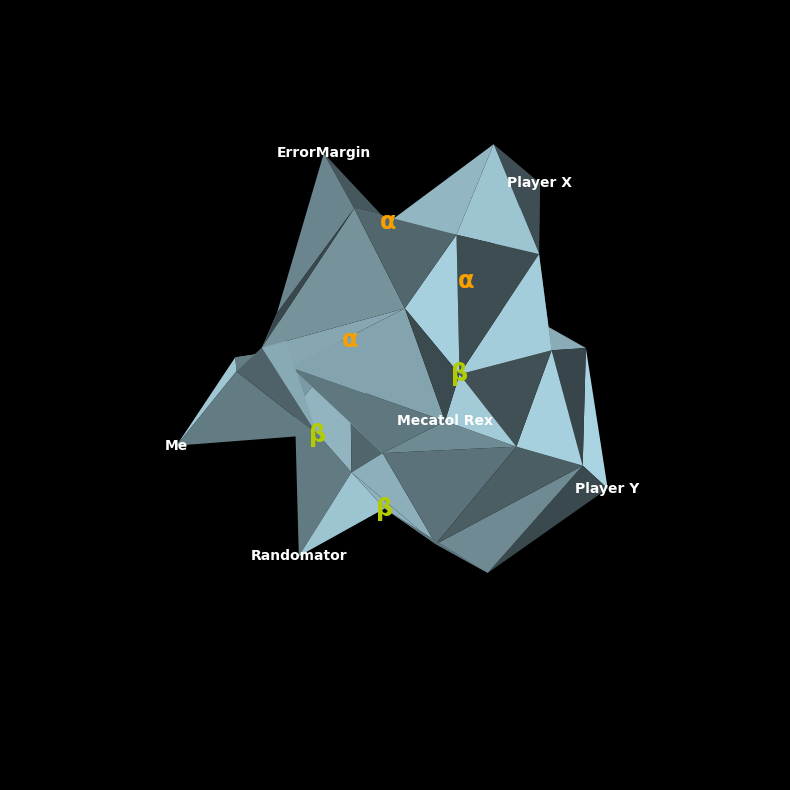

In [33]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
# main.plot_tile(ax, 0.5, pos_full[0:2, 18], main.TileSpec(18))
ax.plot_trisurf(
    pos_full[0],
    pos_full[1],
    pos_full[2],
    triangles=board_penta.get_triangle_indices(),
    color="lightblue",
)
ax.axis(False)
ax.set_facecolor("black")
fig.set_facecolor("black")

draw_players_3d(pos_full)

draw_wormholes_3d(board_full, pos_full)

ax.view_init(roll=180)

# plt.show()
# ax.imshow(tile)

# Plotting transitions

In [34]:
pos_penta = main.Planariser(board_penta, num_dims=3, seed=0).fit_embeddding(
    num_iterations=5000,
)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [35]:
plt.close()

In [49]:
def zoom_lim(lim, factor):
    fro, to = lim
    delta = to - fro
    mid = (fro + to) / 2.0
    new_delta = delta / factor
    return mid - new_delta / 2.0, mid + new_delta / 2.0

In [53]:
zoom_lim((1, 1.5), 1)

(1.0, 1.5)

/tmp/ipykernel_3049/3449430829.py:53: UserWarning: frames=<function gen at 0x7f3886394e00> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

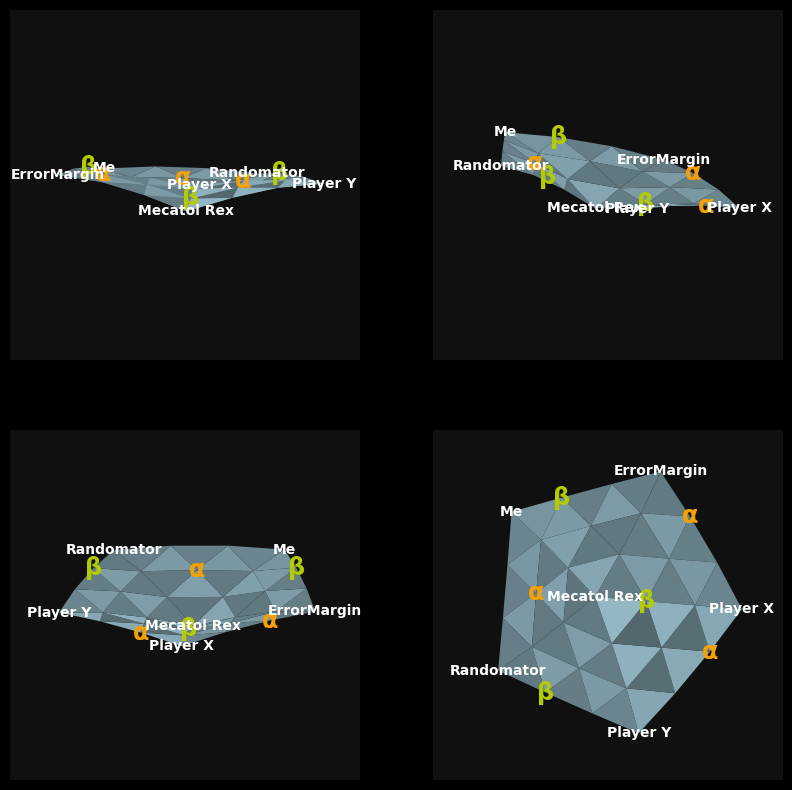

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={"projection": "3d"})
axs = [ax for row in axs for ax in row]
trisurf = {}
for ax, (elev, azim, roll) in zip(
    axs,
    [
        (10, -90, 180),
        (10, 0, 180),
        (10, 90, 180),
        (90, 0, 180),
    ],
):
    ax.axis(False)
    ax.set_facecolor("#101010")
    fig.set_facecolor("black")
    ax.view_init(elev=elev, azim=azim, roll=roll)
    rad = 2.5
    ax.set_xlim3d(-rad, rad)
    ax.set_ylim3d(-rad, rad)
    ax.set_zlim3d(-rad, rad)

# draw_players_3d(pos_penta)

# draw_wormholes_3d(board_full, pos_penta)
        
def update(data):
    global trisurf
    pos = data
    # print(pos[:, 0])
    for ax in axs:
        if ax in trisurf:
            for artist in trisurf[ax]:
                artist.set_visible(False)
                artist.remove()
            del trisurf[ax]
            
        artists = [ax.plot_trisurf(
            pos[0],
            pos[1],
            pos[2],
            triangles=board_penta.get_triangle_indices(),
            color="lightblue",
        )]
        artists += draw_wormholes_3d(ax, board_full, pos)
        artists += draw_players_3d(ax, pos)
        trisurf[ax] = artists

def gen():
    yield from main.Planariser(board_full, num_dims=3, seed=0, starting_positions=pos_penta.detach().clone(), optimization_speed=0.05).iter_embedddings(
        num_iterations=600,
    )

anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)
# plt.show()
# ax.imshow(tile)

anim.save(VID_PREFIX + "transition.mp4")
# HTML(anim.to_html5_video())

In [62]:
max_idx = max(node.idx for node in board_full.node_meta)
nodes_with_gamma = [
    node if node.tile_spec.idx != 66 else replace(
        node,
        wormhole_labels=("γ",),
    )
    for node in board_full.node_meta
]
mirage_node_unflipped = main.GameboardNode(idx=max_idx + 1, tile_spec=main.TileSpec(82), wormhole_labels=("μ",))
edges = [main.Edge(mirage_node_unflipped.idx, node.idx, None) for node in nodes_with_gamma if node.wormhole_labels == ("γ",)]
# edges = [main.Edge(mirage_node_unflipped.idx, node.idx, None) for node in nodes_with_gamma if "γ" in node.wormhole_labels]
board_with_mallice_unflipped = main.Graph(
    node_meta=nodes_with_gamma + [mirage_node_unflipped],
    edges=board_full.edges + edges,
)

In [63]:
max_idx = max(node.idx for node in board_full.node_meta)
nodes_with_gamma = [
    node if node.tile_spec.idx != 66 else replace(
        node,
        wormhole_labels=("γ",),
    )
    for node in board_full.node_meta
]
mirage_node_unflipped = main.GameboardNode(idx=max_idx + 1, tile_spec=main.TileSpec(82), wormhole_labels=("μ",))
edges = [main.Edge(mirage_node_unflipped.idx, node.idx, None) for node in nodes_with_gamma if node.wormhole_labels != tuple()]
# edges = [main.Edge(mirage_node_unflipped.idx, node.idx, None) for node in nodes_with_gamma if "γ" in node.wormhole_labels]
board_with_mallice = main.Graph(
    node_meta=nodes_with_gamma + [mirage_node_unflipped],
    edges=board_full.edges + edges,
)

In [64]:
initial = main.Planariser(board_with_mallice_unflipped, 3, seed=8).fit_embeddding(
    num_iterations=3000,
)

  0%|          | 0/3000 [00:00<?, ?it/s]

/tmp/ipykernel_3049/2004900911.py:31: UserWarning: frames=<function gen at 0x7f38883cfb00> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)


  0%|          | 0/361 [00:00<?, ?it/s]

  0%|          | 0/361 [00:00<?, ?it/s]

  0%|          | 0/361 [00:00<?, ?it/s]

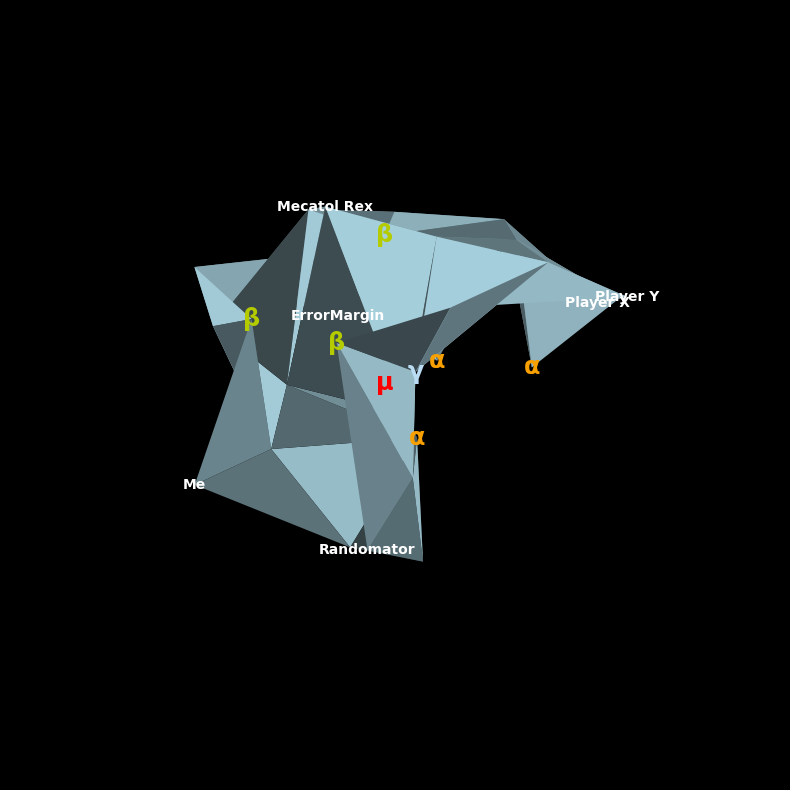

In [66]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
# main.plot_tile(ax, 0.5, pos_full[0:2, 18], main.TileSpec(18))
ax.plot_trisurf(
    initial[0],
    initial[1],
    initial[2],
    triangles=board_penta.get_triangle_indices(),
    color="lightblue",
)
ax.axis(False)
ax.set_facecolor("black")
fig.set_facecolor("black")

draw_wormholes_3d(ax, board_with_mallice_unflipped, initial)
draw_players_3d(ax, initial)
        
def update(data):
    angle = data
    ax.view_init(elev=0., azim=angle, roll=180)
    # clear_output(wait=True)
    # fig.show()
    # time.sleep(0.02)
    # plt.draw()
    # plt.pause(0.25)

def gen():
    for angle in tqdm(list(range(0, 360 + 1, 1))):
        yield angle

update(0)
anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)
# plt.show()
# ax.imshow(tile)

anim.save(VID_PREFIX + "malice_preflip.mp4")

/tmp/ipykernel_3049/3706934231.py:53: UserWarning: frames=<function gen at 0x7f38866679c0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

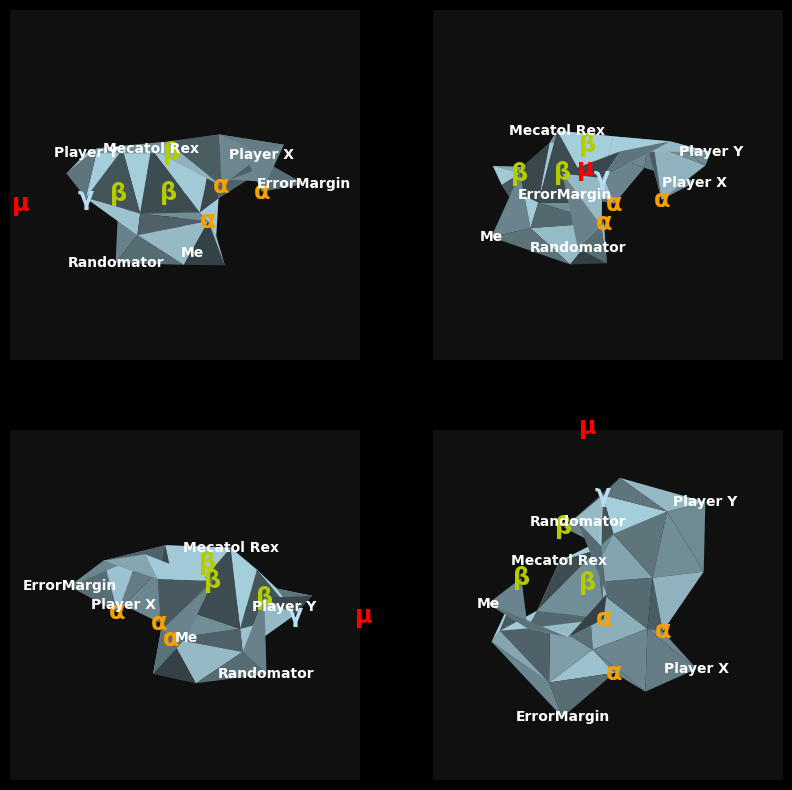

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={"projection": "3d"})
axs = [ax for row in axs for ax in row]
trisurf = {}
fig.set_facecolor("black")
for ax, (elev, azim, roll) in zip(
    axs,
    [
        (10, -90, 180),
        (10, 0, 180),
        (10, 90, 180),
        (90, 0, 180),
    ],
):
    rad = 2
    ax.set_xlim3d(-rad, rad)
    ax.set_ylim3d(-rad, rad)
    ax.set_zlim3d(-rad, rad)
    ax.axis(False)
    ax.set_facecolor("#101010")
    ax.view_init(elev=elev, azim=azim, roll=roll)

# draw_players_3d(pos_penta)

# draw_wormholes_3d(board_full, pos_penta)
        
def update(data):
    global trisurf
    pos = data
    # print(pos[:, 0])
    for ax in axs:
        if ax in trisurf:
            for artist in trisurf[ax]:
                artist.set_visible(False)
                artist.remove()
            del trisurf[ax]
            
        artists = [ax.plot_trisurf(
            pos[0],
            pos[1],
            pos[2],
            triangles=board_penta.get_triangle_indices(),
            color="lightblue",
        )]
        artists += draw_wormholes_3d(ax, board_with_mallice, pos)
        artists += draw_players_3d(ax, pos)
        trisurf[ax] = artists

def gen():
    yield from main.Planariser(board_with_mallice, num_dims=3, seed=0, starting_positions=initial.detach().clone(), optimization_speed=0.05).iter_embedddings(
        num_iterations=600,
    )

anim = m_anim.FuncAnimation(fig, update, gen, interval=30, repeat=True)
# plt.show()
# ax.imshow(tile)

anim.save(VID_PREFIX + "malice_during_flip.mp4")
# HTML(anim.to_html5_video())